# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [19]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

<AxesSubplot:xlabel='Age', ylabel='Absences'>

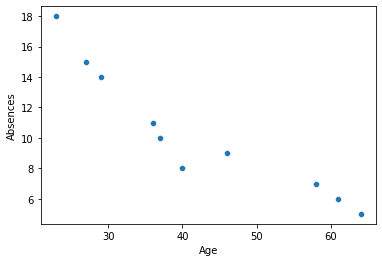

In [31]:
# your code here

employees = pd.read_csv("data/absences.csv")
employees.drop(["Unnamed: 0"], axis=1, inplace=True)
employees

sns.scatterplot(x="Age", y="Absences", data=employees)

In [ ]:
# your comments here

# They younger the employee the higher the absences

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [29]:
# your code here

def slopeInter(x, y):
    
    age_mean = np.mean(x)
    absence_mean = np.mean(y)

    xi_x = np.array([age - age_mean for age in x])
    yi_y = np.array([absence - absence_mean for absence in y])

    numerator = np.sum(xi_x * yi_y)

    xi_x2 = np.array([(age - age_mean)**2 for age in y])
    denominator = np.sum(xi_x2)

    slope = numerator / denominator

    # Intercept
    intercept = absence_mean - slope*age_mean
    
    return slope, intercept

In [ ]:
bill_mean = np.mean(bill)
tip_mean = np.mean(tip)

xi_x = np.array([b - bill_mean for b in bill])
yi_y = np.array([t - tip_mean for t in tip])

numerator = np.sum(xi_x * yi_y)

xi_x2 = np.array([(b - bill_mean)**2 for b in bill])
denominator = np.sum(xi_x2)

slope = numerator / denominator
slope

# Intercept
intercept = tip_mean - slope*bill_mean
intercept

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [28]:
# your code here

slopeInter(employees["Age"], employees["Absences"])

(-0.05055244585057191, 12.428257970309078)

<AxesSubplot:xlabel='Age', ylabel='Absences'>

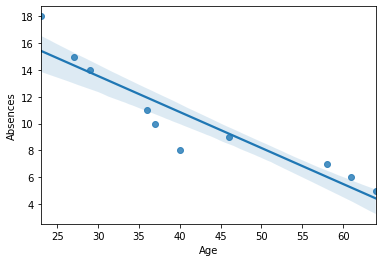

In [33]:
sns.regplot(x="Age", y="Absences", data=employees, ci=80)

In [ ]:
# your comments here

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [44]:
# your code here

def covCorr(var1, var2):
    #covarince
    covariance = var1.cov(var2)
    # correlation 
    column_1 = var1
    column_2 = var2
    correlation = column_1.corr(column_2) 
    
    return covariance, correlation 

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [46]:
# your code here
covCorr(employees["Age"], employees["Absences"])

(-57.69999999999999, -0.932543409248101)

In [ ]:
# your comments here

# Whit the covariance we can confirm that there´s an inverse dependency the bigger the x values the smaller the y values. 


#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [121]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [122]:
# your code here
covCorr(ironbeers_df["X"], ironbeers_df["Y"])

(12.0, 0.9770084209183943)

In [123]:
# your comments here

# There´s a direct dependency (positive), the bigger the values of x the bigger the values of y.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

<AxesSubplot:xlabel='X', ylabel='Y'>

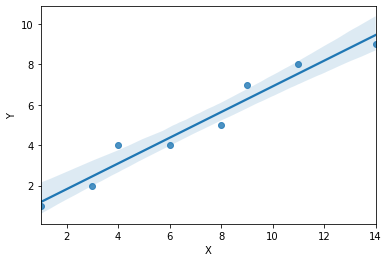

In [124]:
# your code here
sns.regplot(x="X", y="Y", data=ironbeers_df)

In [125]:
# your comments here

# we can see that there´s a positive correlation with all the data points very close to the regression line. 

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [126]:
import scipy.stats as stats

In [127]:
# your code here

slope, intercept, r_value, p_value, std_err = stats.linregress(ironbeers_df["X"], ironbeers_df["Y"])

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [128]:
# your comments here

# It looks like I am not the reason why people is not staying. 

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [129]:
# your code here

ironbeers_df["expected_Y"] = [intercept + slope * x for x in ironbeers_df["X"]]
ironbeers_df

,X,Y,expected_Y
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [130]:
# your code here

ironbeers_df["error"] = ironbeers_df["expected_Y"] - ironbeers_df["Y"]
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.181818,0.181818
1,3,2,2.454545,0.454545
2,4,4,3.090909,-0.909091
3,6,4,4.363636,0.363636
4,8,5,5.636364,0.636364
5,9,7,6.272727,-0.727273
6,11,8,7.545455,-0.454545
7,14,9,9.454545,0.454545


<AxesSubplot:xlabel='X', ylabel='error'>

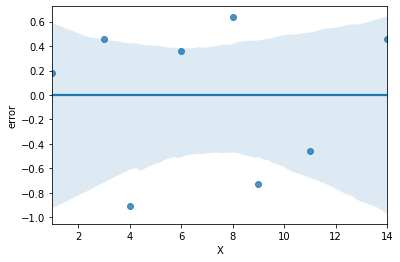

In [131]:
sns.regplot(x="X", y="error", data=ironbeers_df)

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#There are 3 points with an error over 0.5 or -0.5: -0.9, 0.63, -0.72

#### 4.- Remove the points with a high error and recalculate the regression line.

In [134]:
# your code here

ironbeers_df.drop(ironbeers_df[ironbeers_df.error > 0.5].index, inplace=True)
ironbeers_df.drop(ironbeers_df[ironbeers_df.error < -0.5].index, inplace=True)

In [135]:
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.181818,0.181818
1,3,2,2.454545,0.454545
3,6,4,4.363636,0.363636
6,11,8,7.545455,-0.454545
7,14,9,9.454545,0.454545


In [136]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ironbeers_df["X"], ironbeers_df["Y"])

In [137]:
slope

0.6525423728813559

In [138]:
intercept

0.23220338983050848

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [139]:
# your code here
covCorr(ironbeers_df["X"], ironbeers_df["Y"])

(19.25, 0.9945299478460592)

In [ ]:
# your comments here

# Correlation has improved with the remuval of the values with a higher error